In [1]:
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

2024-03-08 10:14:32.790363: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 10:14:32.790482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 10:14:32.934355: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
dataset_path = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'

images = []
labels = []

for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
        labels.append(subfolder)
 
df = pd.DataFrame({'image': images, 'label': labels})

In [3]:
df.head()

,image,label
0,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
1,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
2,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
3,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
4,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag


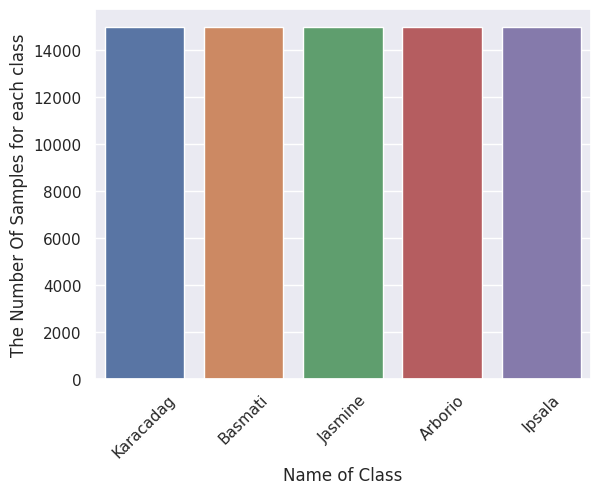

In [4]:
ax = sns.countplot(x=df.label)

ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

plt.xticks(rotation=45)

plt.show()

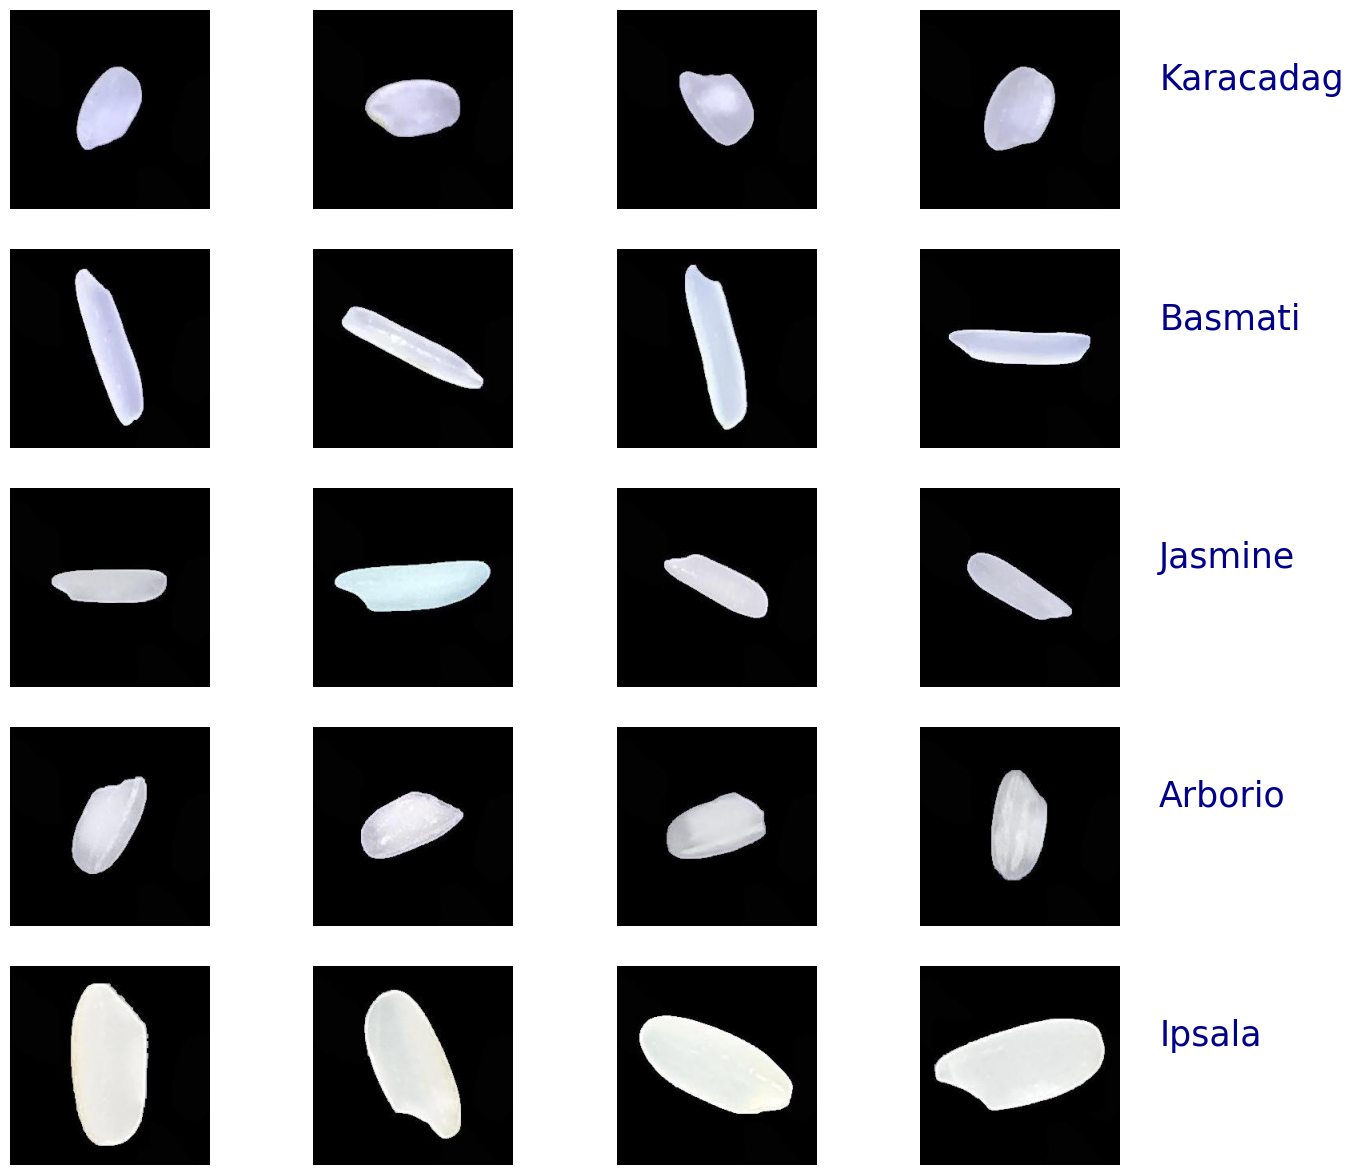

In [5]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

for i, category in enumerate(df['label'].unique()):

    filepaths = df[df['label'] == category]['image'].values[:4]

    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

df_train = pd.DataFrame({'image': X_train, 'label': y_train})

df_test = pd.DataFrame({'image': X_test, 'label': y_test})

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (50, 50)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


In [10]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5


2024-03-08 10:23:07.506032: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 511: 3.99746, expected 3.4575
2024-03-08 10:23:07.506109: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4608: 6.74587, expected 5.87283
2024-03-08 10:23:07.506118: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4609: 6.53509, expected 5.66205
2024-03-08 10:23:07.506126: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4610: 6.96058, expected 6.08753
2024-03-08 10:23:07.506133: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4611: 6.70752, expected 5.83448
2024-03-08 10:23:07.506141: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4612: 6.81476, expected 5.94172
2024-03-08 10:23:07.506149: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4613: 6.40484, expected 5.5318
2024-03-08 10:23:07.506157: E externa

   1/1875 ━━━━━━━━━━━━━━━━━━━━ 3:22:19 6s/step - accuracy: 0.1875 - loss: 1.5952

I0000 00:00:1709893389.591441     583 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709893389.609978     583 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1868/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.7547 - loss: 0.5751

W0000 00:00:1709893710.802680     586 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-03-08 10:29:45.857181: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4609: 8.26198, expected 7.31515
2024-03-08 10:29:45.857241: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4611: 7.25777, expected 6.31095
2024-03-08 10:29:45.857250: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4613: 6.27633, expected 5.32951
2024-03-08 10:29:45.857259: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4614: 7.71631, expected 6.7695
2024-03-08 10:29:45.857266: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4615: 6.78712, expected 5.8403
2024-03-08 10:29:45.857274: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4616: 7.83563, expected 6.88881
2024-03-08 10:29:45.857282: E external/local_xla/

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 403s 212ms/step - accuracy: 0.7552 - loss: 0.5741 - val_accuracy: 0.9435 - val_loss: 0.1720
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 164s 87ms/step - accuracy: 0.9470 - loss: 0.1448 - val_accuracy: 0.9705 - val_loss: 0.0856
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 170s 90ms/step - accuracy: 0.9609 - loss: 0.1102 - val_accuracy: 0.9625 - val_loss: 0.1031
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 171s 91ms/step - accuracy: 0.9690 - loss: 0.0911 - val_accuracy: 0.9775 - val_loss: 0.0663
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 165s 88ms/step - accuracy: 0.9763 - loss: 0.0705 - val_accuracy: 0.9812 - val_loss: 0.0599


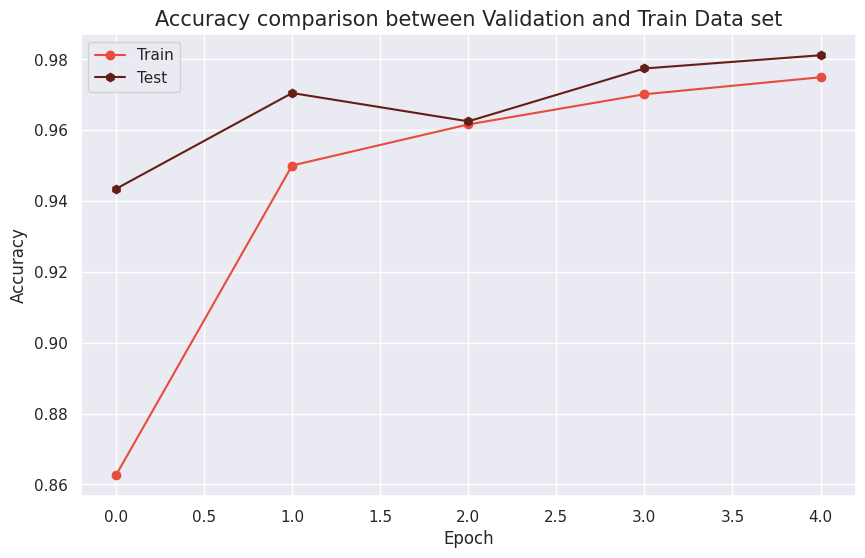

In [16]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(history.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

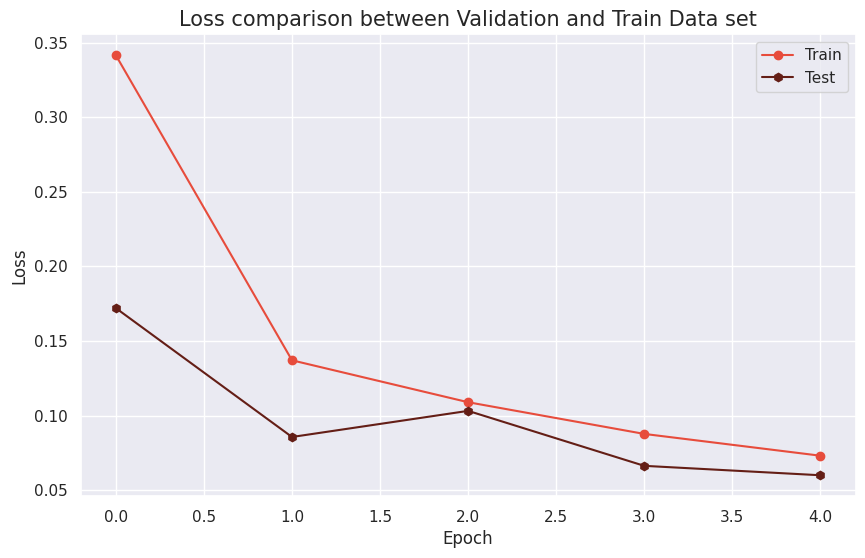

In [18]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],color="#E74C3C",marker='o')
plt.plot(history.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [19]:
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9824 - loss: 0.0514
Accuracy: 0.9824000000953674


In [20]:
model.save('CNN_model.h5')

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16

In [31]:
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(50, 50, 3),
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
for layer in base_model.layers:
    layer.trainable = False

In [33]:
model2 = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

In [34]:
model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [35]:
history2 = model2.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 199s 103ms/step - accuracy: 0.8260 - loss: 0.4482 - val_accuracy: 0.9175 - val_loss: 0.2153
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 179s 95ms/step - accuracy: 0.9233 - loss: 0.1980 - val_accuracy: 0.9313 - val_loss: 0.1816
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 180s 96ms/step - accuracy: 0.9330 - loss: 0.1759 - val_accuracy: 0.9401 - val_loss: 0.1618
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 178s 95ms/step - accuracy: 0.9386 - loss: 0.1601 - val_accuracy: 0.9412 - val_loss: 0.1568
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 181s 96ms/step - accuracy: 0.9431 - loss: 0.1528 - val_accuracy: 0.9313 - val_loss: 0.1840
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 181s 96ms/step - accuracy: 0.9420 - loss: 0.1504 - val_accuracy: 0.9457 - val_loss: 0.1443
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 179s 95ms/step - accuracy: 0.9449 - loss: 0.1469 - val_accuracy: 0.9535 - val_loss: 0.1306
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 178s 95ms/step - accuracy:

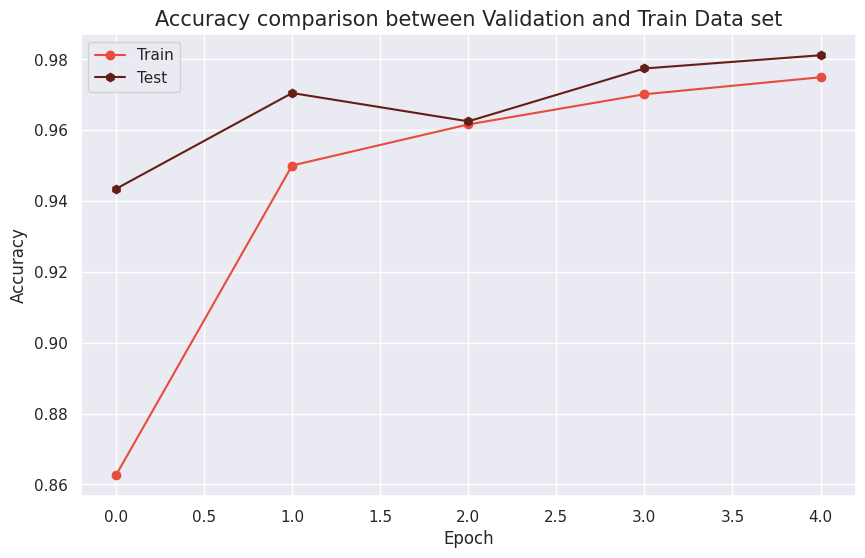

In [36]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(history.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

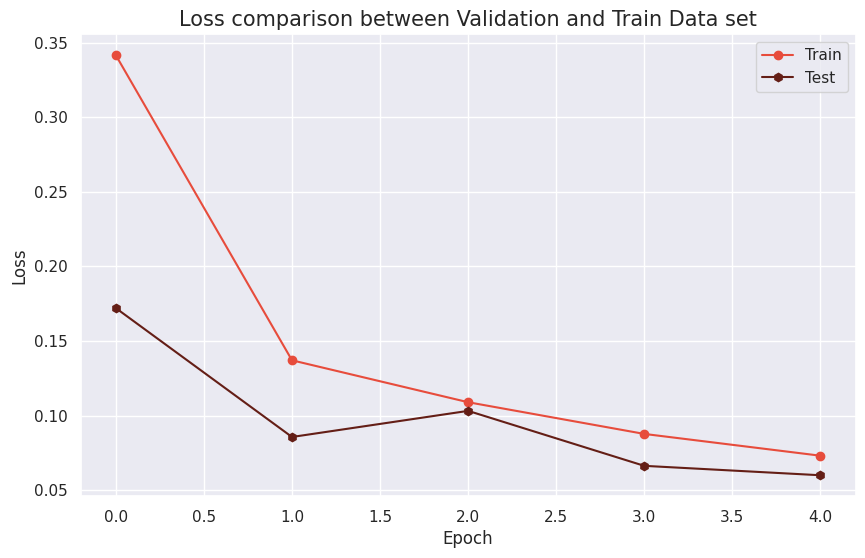

In [37]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],color="#E74C3C",marker='o')
plt.plot(history.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()